In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings
import itertools

In [3]:
sales_data = pd.read_csv("Pizza_Sale.csv")

In [4]:
sales_data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
sales_data.tail(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48610,48611,21346,soppressata_l,1,31-12-2015,20:51:07,20.75,20.75,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
48611,48612,21347,bbq_ckn_m,1,31-12-2015,21:14:37,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
48612,48613,21347,ital_supr_m,1,31-12-2015,21:14:37,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
48613,48614,21347,peppr_salami_s,1,31-12-2015,21:14:37,12.50,12.50,S,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
48614,48615,21347,southw_ckn_l,1,31-12-2015,21:14:37,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [6]:
sales_data.shape

(48620, 12)

In [7]:
sales_data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [9]:
sales_data.isnull().mean()*100

pizza_id             0.000000
order_id             0.000000
pizza_name_id        0.032908
quantity             0.000000
order_date           0.000000
order_time           0.000000
unit_price           0.000000
total_price          0.014397
pizza_size           0.000000
pizza_category       0.047306
pizza_ingredients    0.026738
pizza_name           0.014397
dtype: float64

In [10]:
sales_data.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [11]:
sales_data['pizza_name_id'].isnull().value_counts()

pizza_name_id
False    48604
True        16
Name: count, dtype: int64

In [12]:
sales_data.duplicated().sum()

np.int64(0)

In [18]:
sales_d1=sales_data.copy()

In [19]:
sales_d1.head(1)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza


In [12]:
# Changing date format

In [22]:
sales_d1["order_date"]=sales_d1["order_date"].apply(pd.to_datetime, errors = 'coerce')        

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_10600\3766857848.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales_d1["order_date"]=sales_d1["order_date"].apply(pd.to_datetime, errors = 'coerce')


In [23]:
sales_d1["order_date"]

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: order_date, Length: 48620, dtype: datetime64[ns]

In [30]:
sales_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48604 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48613 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48597 non-null  object        
 10  pizza_ingredients  48607 non-null  object        
 11  pizza_name         48613 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


# Treating null values

In [31]:
sales_d1.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [17]:
# checking for pizza name id

In [32]:
sales_d1['pizza_name_id'].fillna(sales_d1['pizza_name_id'].mode()[0], inplace = True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_10600\2643400775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_d1['pizza_name_id'].fillna(sales_d1['pizza_name_id'].mode()[0], inplace = True)


In [33]:
sales_d1['pizza_name_id'].isnull().sum()

np.int64(0)

In [15]:
# checking for total price

In [34]:
sales_d1.loc[sales_d1["total_price"].isnull()]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
781,782,341,bbq_ckn_m,1,2015-06-01,15:35:47,16.75,NaN,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
782,783,341,pepperoni_s,1,2015-06-01,15:35:47,9.75,NaN,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
783,784,342,sicilian_l,1,2015-06-01,15:44:12,20.25,NaN,L,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
784,785,342,southw_ckn_l,1,2015-06-01,15:44:12,20.75,NaN,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
785,786,343,five_cheese_l,1,2015-06-01,15:45:37,18.50,NaN,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
786,787,343,four_cheese_m,1,2015-06-01,15:45:37,14.75,NaN,M,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
787,788,344,ital_cpcllo_m,1,2015-06-01,16:01:11,16.00,NaN,M,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",The Italian Capocollo Pizza


In [35]:
null_price = sales_d1['total_price'].isnull()

In [36]:
sales_d1.loc[null_price, 'total_price']

781   NaN
782   NaN
783   NaN
784   NaN
785   NaN
786   NaN
787   NaN
Name: total_price, dtype: float64

In [37]:
sales_d1.loc[null_price, 'total_price']=sales_d1.loc[null_price,'unit_price'] * sales_d1.loc[null_price, 'quantity']

In [38]:
sales_d1.loc[null_price, 'total_price']

781    16.75
782     9.75
783    20.25
784    20.75
785    18.50
786    14.75
787    16.00
Name: total_price, dtype: float64

In [21]:
# treating pizza category, ingredient, name

In [39]:
null_val = sales_d1['pizza_category'].isnull()

In [40]:
sales_d1.loc[null_val, 'pizza_category']

426    NaN
427    NaN
428    NaN
429    NaN
430    NaN
431    NaN
432    NaN
433    NaN
434    NaN
435    NaN
486    NaN
487    NaN
488    NaN
489    NaN
490    NaN
491    NaN
511    NaN
512    NaN
513    NaN
514    NaN
515    NaN
516    NaN
517    NaN
Name: pizza_category, dtype: object

In [41]:
sales_d1.loc[null_val, "pizza_category"] = sales_d1.groupby(['pizza_name', 'pizza_ingredients'])['pizza_category'].transform(lambda x: x.ffill().bfill())[null_val]

In [42]:
sales_d1['pizza_category'].isnull().mean()

np.float64(0.0)

In [26]:
# Pizza ingredient null value

In [43]:
null_row =sales_d1['pizza_ingredients'].isnull()

In [44]:
sales_d1.loc[null_row, 'pizza_ingredients']

580    NaN
581    NaN
582    NaN
583    NaN
584    NaN
585    NaN
586    NaN
630    NaN
631    NaN
632    NaN
633    NaN
634    NaN
635    NaN
Name: pizza_ingredients, dtype: object

In [45]:
sales_d1.loc[null_row, "pizza_ingredients"] = sales_d1.groupby(['pizza_name', 'pizza_category','pizza_size'])['pizza_ingredients'].transform(lambda x: x.ffill().bfill())[null_row]

In [46]:
sales_d1['pizza_ingredients'].isnull().mean()

np.float64(0.0)

In [47]:
sales_d1.loc[null_row, 'pizza_ingredients']

580    Mozzarella Cheese, Provolone Cheese, Smoked Go...
581    Mozzarella Cheese, Provolone Cheese, Smoked Go...
582    Spinach, Mushrooms, Tomatoes, Green Olives, Fe...
583             Sliced Ham, Pineapple, Mozzarella Cheese
584    Spinach, Mushrooms, Red Onions, Feta Cheese, G...
585                  Pepperoni, Mushrooms, Green Peppers
586    Chicken, Artichoke, Spinach, Garlic, Jalapeno ...
630    Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...
631    Eggplant, Artichokes, Tomatoes, Zucchini, Red ...
632    Chicken, Tomatoes, Red Peppers, Red Onions, Ja...
633    Chicken, Artichoke, Spinach, Garlic, Jalapeno ...
634    Chicken, Red Onions, Red Peppers, Mushrooms, A...
635    Prosciutto di San Daniele, Arugula, Mozzarella...
Name: pizza_ingredients, dtype: object

In [48]:
sales_d1.loc[[586,630,633,635,580,581,582,585,517,516    ]]

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
586,587,257,cali_ckn_l,1,2015-05-01,11:59:04,20.75,20.75,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
630,631,277,four_cheese_m,1,2015-05-01,15:41:50,14.75,14.75,M,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
633,634,279,cali_ckn_m,1,2015-05-01,16:07:03,16.75,16.75,M,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
635,636,280,prsc_argla_m,1,2015-05-01,16:20:23,16.50,16.50,M,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
580,581,254,five_cheese_l,1,2015-04-01,22:22:13,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
581,582,255,five_cheese_l,1,2015-05-01,11:23:35,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
582,583,255,green_garden_m,1,2015-05-01,11:23:35,16.00,16.00,M,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",The Green Garden Pizza
585,586,256,pep_msh_pep_l,1,2015-05-01,11:56:06,17.50,17.50,L,Classic,"Pepperoni, Mushrooms, Green Peppers","The Pepperoni, Mushroom, and Peppers Pizza"
517,518,221,prsc_argla_m,1,2015-04-01,15:33:18,16.50,16.50,M,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
516,517,221,five_cheese_l,1,2015-04-01,15:33:18,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


In [33]:
# Treaing pizza name

In [49]:
null_name = sales_d1['pizza_name'].isnull()

In [50]:
sales_d1.loc[null_name, 'pizza_name']

688    NaN
689    NaN
690    NaN
691    NaN
692    NaN
693    NaN
694    NaN
Name: pizza_name, dtype: object

In [51]:
sales_d1.loc[null_name, "pizza_name"] = sales_d1.groupby(['pizza_ingredients', 'pizza_category'])['pizza_name'].transform(lambda x: x.ffill().bfill())[null_name]

In [52]:
sales_d1['pizza_name'].isnull().mean()

np.float64(0.0)

In [53]:
sales_d1.loc[null_name, 'pizza_name']

688        The Pepperoni Pizza
689         The Hawaiian Pizza
690         The Mexicana Pizza
691        The Pepperoni Pizza
692         The Sicilian Pizza
693    The Spicy Italian Pizza
694         The Big Meat Pizza
Name: pizza_name, dtype: object

In [54]:
sales_d1.duplicated().sum()

np.int64(0)

In [55]:
sales_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [56]:
sales_d1.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6,2,thai_ckn_l,1,2015-01-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7,3,ital_supr_m,1,2015-01-01,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8,3,prsc_argla_l,1,2015-01-01,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9,4,ital_supr_m,1,2015-01-01,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10,5,ital_supr_m,1,2015-01-01,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [57]:
sales_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [ ]:
# convert ordertime to timedelta

In [58]:
sales_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [60]:
for i in sales_d1['order_time'].unique():
    print(i)


11:38:36
11:57:40
12:12:28
12:16:31
12:21:30
12:29:36
12:50:37
12:51:37
12:52:01
13:00:15
13:02:59
13:04:41
13:11:55
13:14:19
13:33:00
13:34:07
13:53:00
13:57:08
13:59:09
14:03:08
14:14:29
14:16:26
14:19:03
14:23:01
14:44:44
14:54:26
15:11:17
15:35:46
15:41:01
15:41:25
15:50:18
15:53:18
15:54:08
16:21:21
16:32:04
16:54:09
16:56:09
17:03:00
17:07:23
17:14:36
17:15:20
17:28:09
17:38:34
17:54:20
17:55:48
18:25:51
18:26:34
18:26:42
18:33:00
18:41:01
18:48:28
18:53:02
18:54:17
19:01:45
19:03:19
19:07:00
19:10:51
19:30:40
19:40:08
20:05:16
20:08:43
20:50:16
20:51:42
20:52:08
21:16:00
21:47:55
22:03:40
22:07:32
22:12:13
11:38:51
11:40:50
11:57:25
11:58:56
12:01:12
12:10:15
12:21:17
12:22:46
12:28:14
12:29:11
12:35:38
12:40:01
12:45:51
12:53:27
13:13:41
13:34:49
13:40:31
14:01:02
14:10:08
14:30:19
15:08:48
15:14:43
15:17:02
15:29:31
16:17:16
16:18:04
16:21:20
16:45:33
17:18:18
17:45:42
17:46:17
17:51:33
17:54:04
18:02:09
18:02:12
18:12:01
18:12:13
18:25:09
18:25:25
18:27:50
18:36:19
18:38:01
1

In [61]:
for col in sales_d1.columns:
    print('Unique Values of ' + col +':')
    print(sales_d1[col].unique())
    print("========================")


Unique Values of pizza_id:
[    1     2     3 ... 48618 48619 48620]
Unique Values of order_id:
[    1     2     3 ... 21348 21349 21350]
Unique Values of pizza_name_id:
['hawaiian_m' 'classic_dlx_m' 'five_cheese_l' 'ital_supr_l' 'mexicana_m'
 'thai_ckn_l' 'ital_supr_m' 'prsc_argla_l' 'bbq_ckn_s' 'the_greek_s'
 'spinach_supr_s' 'classic_dlx_s' 'green_garden_s' 'ital_cpcllo_l'
 'ital_supr_s' 'mexicana_s' 'spicy_ital_l' 'spin_pesto_l' 'veggie_veg_s'
 'mexicana_l' 'southw_ckn_l' 'bbq_ckn_l' 'cali_ckn_l' 'cali_ckn_m'
 'pepperoni_l' 'cali_ckn_s' 'ckn_pesto_l' 'big_meat_s' 'calabrese_m'
 'four_cheese_m' 'ital_veggie_s' 'mediterraneo_m' 'peppr_salami_s'
 'spinach_fet_l' 'napolitana_l' 'sicilian_l' 'ital_cpcllo_m'
 'southw_ckn_s' 'bbq_ckn_m' 'pepperoni_m' 'prsc_argla_s' 'sicilian_m'
 'veggie_veg_l' 'ckn_alfredo_s' 'pepperoni_s' 'green_garden_l'
 'green_garden_m' 'pep_msh_pep_l' 'hawaiian_s' 'four_cheese_l'
 'peppr_salami_m' 'ckn_alfredo_m' 'peppr_salami_l' 'spin_pesto_s'
 'thai_ckn_m' 'classic

In [62]:
sales_d1['order_time'] = pd.to_timedelta(sales_d1['order_time'])

In [63]:
sales_d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   pizza_id           48620 non-null  int64          
 1   order_id           48620 non-null  int64          
 2   pizza_name_id      48620 non-null  object         
 3   quantity           48620 non-null  int64          
 4   order_date         48620 non-null  datetime64[ns] 
 5   order_time         48620 non-null  timedelta64[ns]
 6   unit_price         48620 non-null  float64        
 7   total_price        48620 non-null  float64        
 8   pizza_size         48620 non-null  object         
 9   pizza_category     48620 non-null  object         
 10  pizza_ingredients  48620 non-null  object         
 11  pizza_name         48620 non-null  object         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5), timedelta64[ns](1)
memory usage: 4.5+ MB


In [39]:
#sales_data['order_time']=pd.to_timedelta(sales_data['order_time'])
#print(sales_data)
#print(sales_data['order_time'].dtype)

       pizza_id  order_id  pizza_name_id  quantity  order_date  \
0             1         1     hawaiian_m         1    1/1/2015   
1             2         2  classic_dlx_m         1    1/1/2015   
2             3         2  five_cheese_l         1    1/1/2015   
3             4         2    ital_supr_l         1    1/1/2015   
4             5         2     mexicana_m         1    1/1/2015   
...         ...       ...            ...       ...         ...   
48615     48616     21348  ckn_alfredo_m         1  31-12-2015   
48616     48617     21348  four_cheese_l         1  31-12-2015   
48617     48618     21348   napolitana_s         1  31-12-2015   
48618     48619     21349     mexicana_l         1  31-12-2015   
48619     48620     21350      bbq_ckn_s         1  31-12-2015   

           order_time  unit_price  total_price pizza_size pizza_category  \
0     0 days 11:38:36       13.25        13.25          M        Classic   
1     0 days 11:57:40       16.00        16.00         

In [65]:
#sales_data['order_date']=pd.to_datetime(sales_data['order_date'], errors = 'coerce')

sales_d1['week_day']=sales_d1['order_date'].dt.day_name()

In [66]:
sales_d1[['order_date','week_day']]

,order_date,week_day
0,2015-01-01,Thursday
1,2015-01-01,Thursday
2,2015-01-01,Thursday
3,2015-01-01,Thursday
4,2015-01-01,Thursday
...,...,...
48615,2015-12-31,Thursday
48616,2015-12-31,Thursday
48617,2015-12-31,Thursday
48618,2015-12-31,Thursday


In [69]:
sales_d1["order_week"]= sales_d1["order_date"].dt.isocalendar().week

In [70]:
sales_d1["order_week"].value_counts()

order_week
48    1159
15    1088
2     1072
42    1029
20    1028
9     1012
32    1004
23     993
10     986
45     985
28     979
14     977
6      965
29     963
37     962
26     961
40     959
30     957
17     953
38     953
4      952
16     952
51     950
46     948
13     944
24     940
11     939
31     938
34     938
12     936
5      934
41     932
33     929
21     926
36     924
7      924
8      914
27     912
3      909
22     909
25     906
18     897
47     888
49     877
43     862
35     852
50     824
44     785
19     752
52     680
39     658
1      581
53     423
Name: count, dtype: Int64

In [71]:
# day type
sales_d1['day_type']=sales_d1['week_day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [72]:
sales_d1.head(1)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,week_day,order_week,day_type
0,1,1,hawaiian_m,1,2015-01-01,0 days 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,1,Weekday


In [73]:
print("Unique elements in week_day are",sales_d1['week_day'].unique())

Unique elements in week_day are ['Thursday' 'Sunday' 'Wednesday' 'Friday' 'Monday' 'Saturday' 'Tuesday']


In [74]:
print("UUnique elements in day_type are", sales_d1['day_type'].unique())

UUnique elements in day_type are ['Weekday' 'Weekend']


In [75]:
null_day = sales_d1['week_day'].isnull()

In [76]:
sales_d1.loc[null_day, 'week_day']

Series([], Name: week_day, dtype: object)

In [77]:
null_da = sales_d1['day_type'].isnull()

In [78]:
sales_d1.loc[null_da, 'day_type']

Series([], Name: day_type, dtype: object)

In [81]:
# creating month column from the data
sales_d1['month']=sales_d1['order_date'].dt.month

In [ ]:
for i in sales_d1['month'].unique():
    print(i)

In [82]:
sales_d1.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,week_day,order_week,day_type,month
0,1,1,hawaiian_m,1,2015-01-01,0 days 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,1,Weekday,1
1,2,2,classic_dlx_m,1,2015-01-01,0 days 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,1,Weekday,1
2,3,2,five_cheese_l,1,2015-01-01,0 days 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,1,Weekday,1
3,4,2,ital_supr_l,1,2015-01-01,0 days 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,1,Weekday,1
4,5,2,mexicana_m,1,2015-01-01,0 days 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,1,Weekday,1


In [85]:
#### saving DF as csv
sales_d1.to_csv('sales_db1.csv') 

In [ ]:
### Ingredient data

In [86]:
Ing_data =pd.read_csv("Pizza_ingredients.csv")

In [87]:
Ing_data

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [88]:
Ing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [89]:
Ing_data.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [90]:
Ing_data.duplicated().sum()

np.int64(0)

In [91]:
Ing_data[Ing_data['Items_Qty_In_Grams'].isnull()]

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [92]:
# checking qty of Brie Carre pizza
Ing_data[Ing_data['pizza_name'] =='The Brie Carre Pizza']

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
22,brie_carre_s,The Brie Carre Pizza,Brie Carre Cheese,30.0
23,brie_carre_s,The Brie Carre Pizza,Prosciutto,30.0
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
25,brie_carre_s,The Brie Carre Pizza,Pears,10.0
26,brie_carre_s,The Brie Carre Pizza,Thyme,5.0
27,brie_carre_s,The Brie Carre Pizza,Garlic,5.0


In [93]:
# checking qty of The Hawaiian Pizza
Ing_data[Ing_data['pizza_name'] =='The Hawaiian Pizza']	

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
150,hawaiian_l,The Hawaiian Pizza,Pineapple,45.0
151,hawaiian_l,The Hawaiian Pizza,Mozzarella Cheese,30.0
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
153,hawaiian_m,The Hawaiian Pizza,Pineapple,30.0
154,hawaiian_m,The Hawaiian Pizza,Mozzarella Cheese,20.0
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN
156,hawaiian_s,The Hawaiian Pizza,Pineapple,15.0
157,hawaiian_s,The Hawaiian Pizza,Mozzarella Cheese,10.0


In [94]:
Ing_data["Items_Qty_In_Grams"].fillna(0, inplace = True)

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_10600\86097123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ing_data["Items_Qty_In_Grams"].fillna(0, inplace = True)


In [95]:
Ing_data.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64

In [96]:
Ing_data.to_csv("ingred_data.csv")

##### EDA  ( Exploratory data analysis)


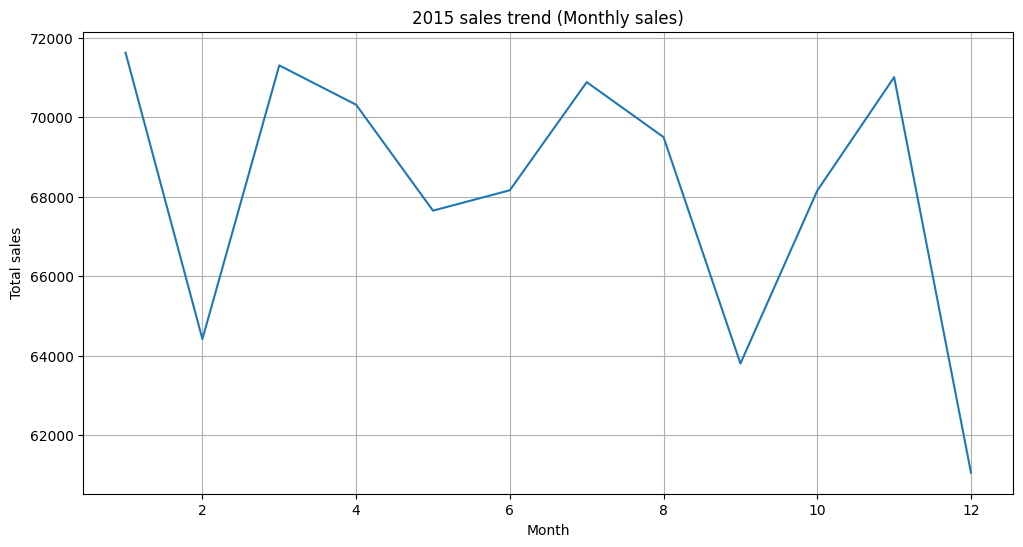

In [97]:
# daily sales analysis
daily_sales = sales_d1.groupby('month')['total_price'].sum()

plt.figure(figsize = (12,6))
daily_sales.plot()
plt.title("2015 sales trend (Monthly sales)")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.grid(True)
plt.show()


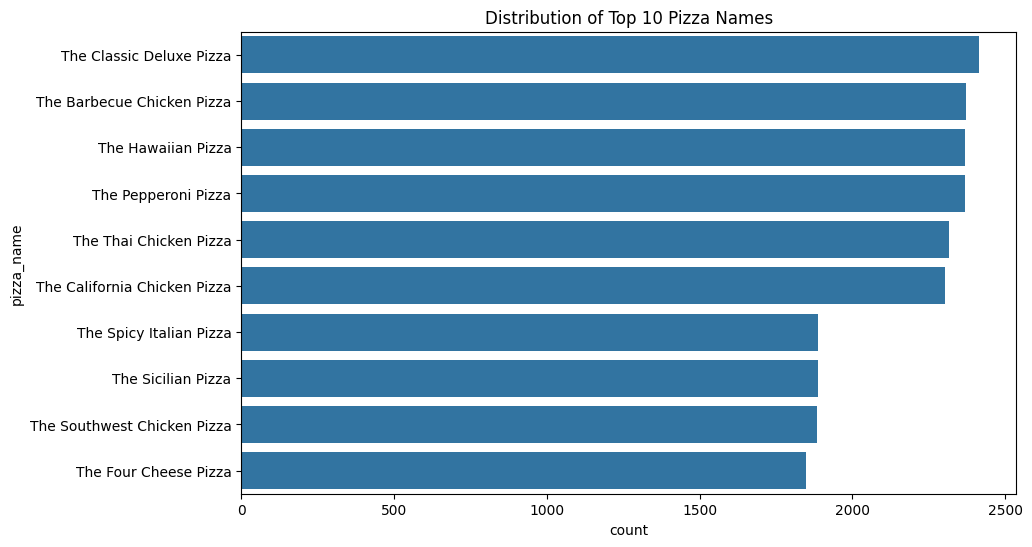

In [98]:
# Distribution of top 10 pizza names
plt.figure(figsize=(10,6))
top_10_pizza =sales_data['pizza_name'].value_counts().nlargest(10).index
sns.countplot(y='pizza_name', data=sales_d1[sales_d1['pizza_name'].isin(top_10_pizza)],order = top_10_pizza)
plt.title("Distribution of Top 10 Pizza Names")
plt.show()

In [99]:
sales_d1.head(1)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,week_day,order_week,day_type,month
0,1,1,hawaiian_m,1,2015-01-01,0 days 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,1,Weekday,1


C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_10600\1414212979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity', y='pizza_ingredients', data=pizza_cat, palette='flare')


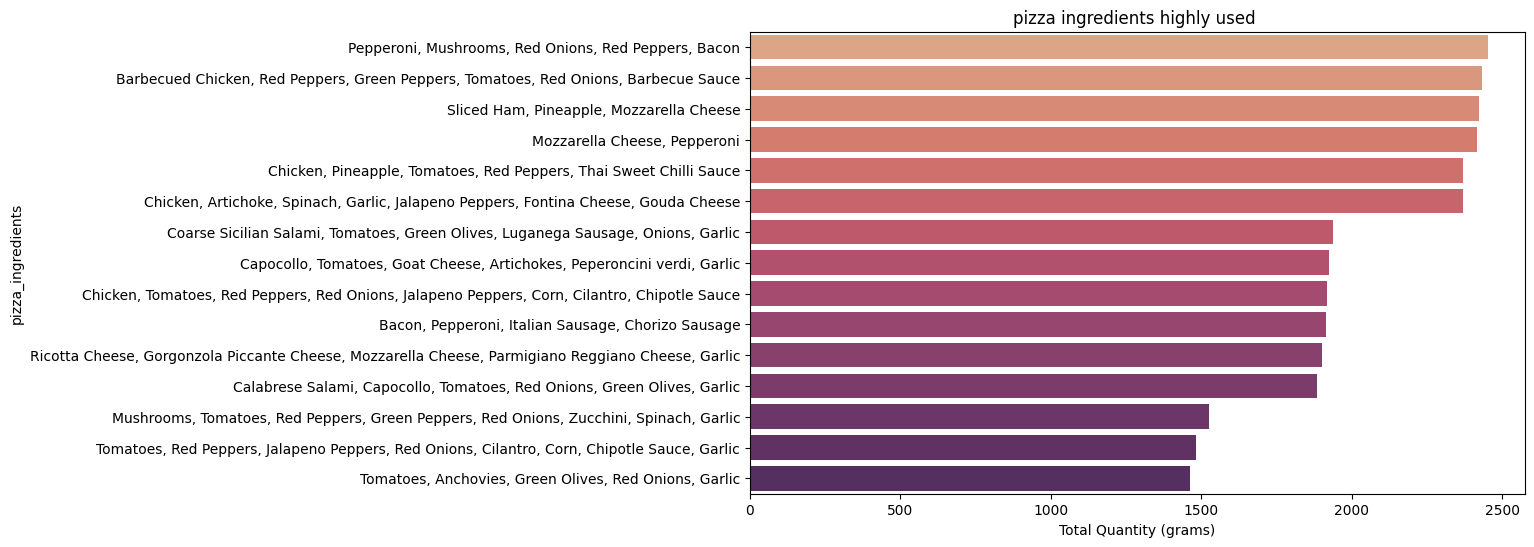

In [100]:
#Distribution of pizza category
plt.figure(figsize=(10, 6))
pizza_cat = sales_d1.groupby('pizza_ingredients')['quantity'].sum().nlargest(15).reset_index()
sns.barplot(x='quantity', y='pizza_ingredients', data=pizza_cat, palette='flare')
plt.title('pizza ingredients highly used ')
plt.xlabel('Total Quantity (grams)')
plt.ylabel('pizza_ingredients')
plt.show()


C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_10600\883522526.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_size.index, y=sales_by_size.values, palette="cubehelix")


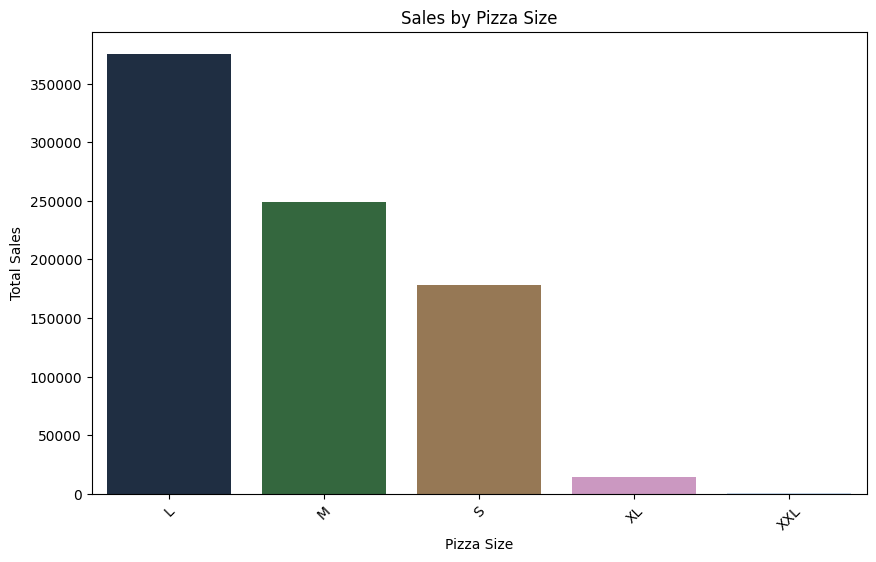

In [101]:
# Sales by pizza size

plt.figure(figsize=(10, 6))
sales_by_size = sales_d1.groupby('pizza_size')['total_price'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_size.index, y=sales_by_size.values, palette="cubehelix")
plt.title("Sales by Pizza Size")
plt.xlabel("Pizza Size")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

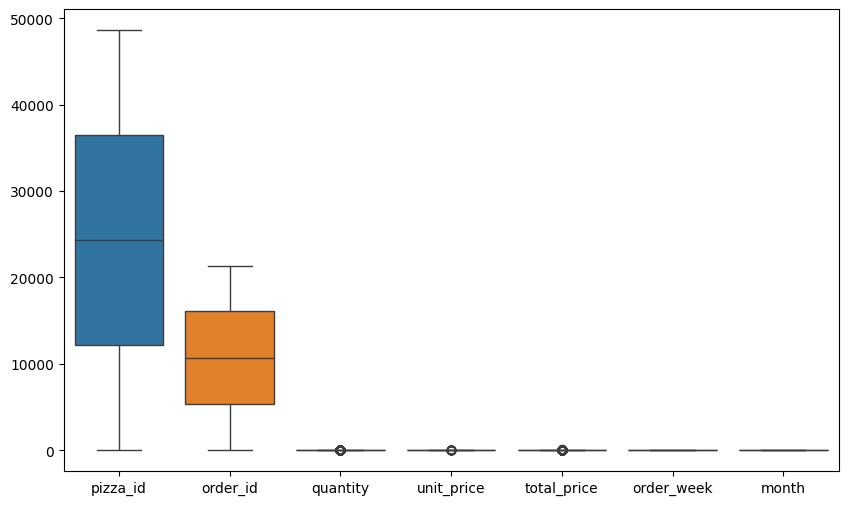

In [102]:
# checking for outlier
plt.figure(figsize=(10,6))
sns.boxplot(data=sales_d1)
plt.show()

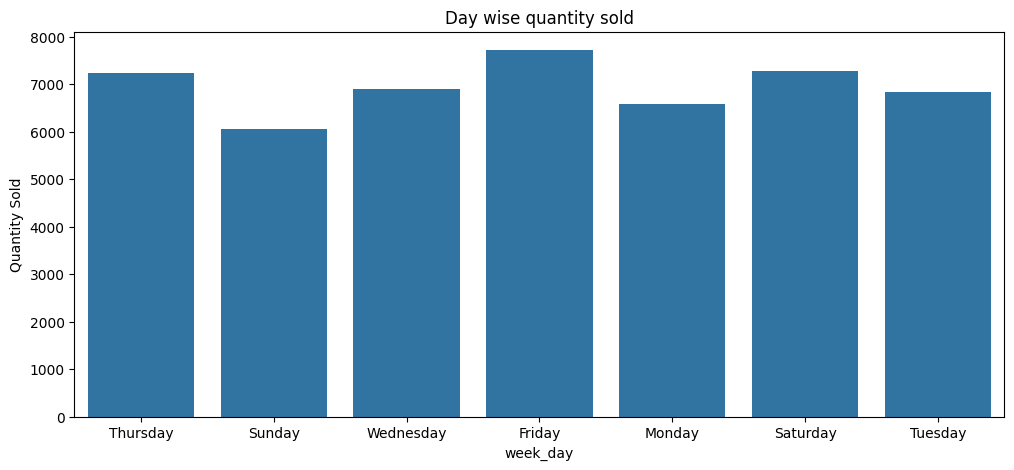

In [104]:
# Highly ordered on friday
plt.figure(figsize=(12,5))
sns.countplot(x="week_day",data=sales_d1)

# plt.xticks(ticks=range(1, 13))

plt.xlabel('week_day')
plt.ylabel('Quantity Sold')
plt.title('Day wise quantity sold')

plt.show()

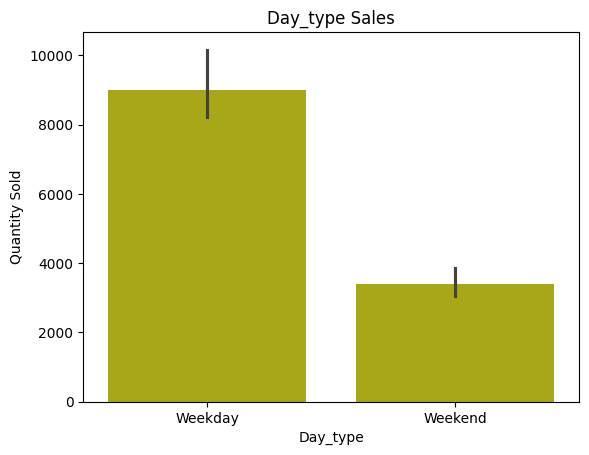

In [105]:
df4 = sales_d1.groupby(['day_type','pizza_category'])['quantity'].sum().reset_index()

sns.barplot(x="day_type", y="quantity", data=df4, color="y")

plt.xlabel('Day_type')
plt.ylabel('Quantity Sold')
plt.title('Day_type Sales')

plt.show()

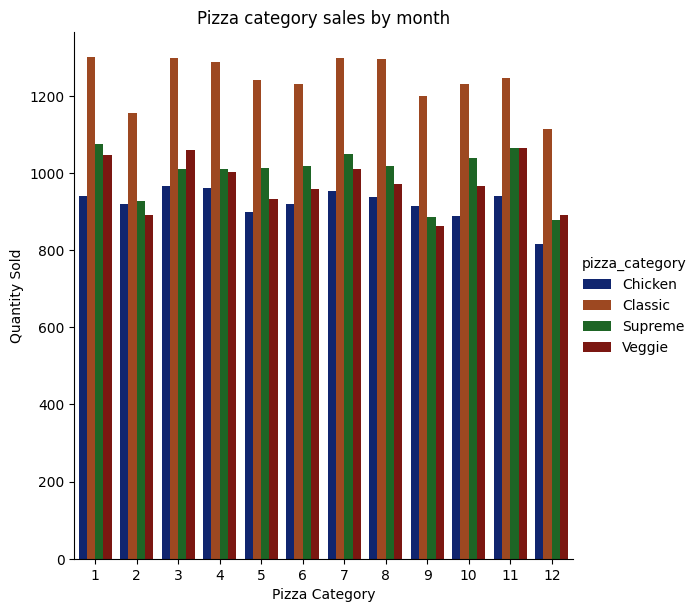

In [106]:
df2 = sales_d1.groupby(['month','pizza_category'])['quantity'].sum().reset_index()

sns.catplot(data=df2, x="month", y="quantity",hue="pizza_category", kind="bar",palette="dark", height=6)

plt.xlabel('Pizza Category')
plt.ylabel('Quantity Sold')
plt.title('Pizza category sales by month')

plt.show()

C:\Users\SG_LENOVO\AppData\Local\Temp\ipykernel_10600\559038004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Items_Qty_In_Grams', y='pizza_ingredients', data=top_15_ingredient_qty, palette='viridis')


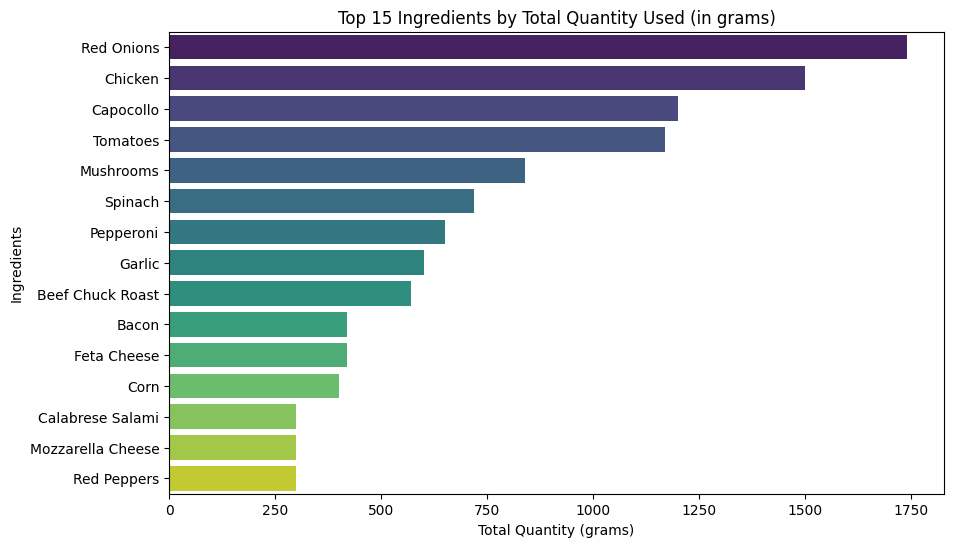

In [109]:
  # Total Quantity of ingredients used in grams - Top 15 (Bar plot)
plt.figure(figsize=(10, 6))
top_15_ingredient_qty = Ing_data.groupby('pizza_ingredients')['Items_Qty_In_Grams'].sum().nlargest(15).reset_index()
sns.barplot(x='Items_Qty_In_Grams', y='pizza_ingredients', data=top_15_ingredient_qty, palette='viridis')
plt.title('Top 15 Ingredients by Total Quantity Used (in grams)')
plt.xlabel('Total Quantity (grams)')
plt.ylabel('Ingredients')
plt.show()